# **Sentiment Analysis of Yelp Reviews - Pre Processing / Modeling**

# Introduction

In the last notebook, we explored the relationships in our data and found things like Polarity which help label our training data. In this notebook we're going to prepare our data so that we can use it as an effective train/test split for building a model in the final notebook

We need to do a few things:


* Categorize and label the data
* Convert the cleaned reviews into vector data
* Create a pipeline using a text vectorization method
* Test the newly categorized / vectorized data on a simple logistic regression









In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

yelp_data = pd.read_csv('https://raw.githubusercontent.com/rabin1323/DataScience_Final_Project/main/Vegas_restaurants_reviews_2017_2016.csv')

In [33]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             2506 non-null   object 
 1   name                    2506 non-null   object 
 2   stars                   2506 non-null   float64
 3   city                    2506 non-null   object 
 4   state                   2506 non-null   object 
 5   postal_code             2506 non-null   int64  
 6   text                    2506 non-null   object 
 7   Review_Word_Count       2506 non-null   int64  
 8   No_Stop_Words:Tokens    2506 non-null   object 
 9   No_Stop_Words:Sentence  2506 non-null   object 
 10  Stop_Word_Count         2506 non-null   int64  
 11  Stop_Words_%            2506 non-null   float64
 12  Lemmatized              2506 non-null   object 
 13  Stemmed:Sentence        2506 non-null   object 
 14  Stemmed:Tokens          2506 non-null   

In [34]:
%pip install langdetect
#install the library
from langdetect import detect
#import detect function from langdetect

Note: you may need to restart the kernel to use updated packages.


In [35]:
yelp_data=yelp_data[yelp_data['No_Stop_Words:Sentence'].apply(detect)=='en']
#yelp is the data frame we will continue to work on.
#yelp only contains English reviews

In [36]:
yelp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2476 entries, 0 to 2505
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_id             2476 non-null   object 
 1   name                    2476 non-null   object 
 2   stars                   2476 non-null   float64
 3   city                    2476 non-null   object 
 4   state                   2476 non-null   object 
 5   postal_code             2476 non-null   int64  
 6   text                    2476 non-null   object 
 7   Review_Word_Count       2476 non-null   int64  
 8   No_Stop_Words:Tokens    2476 non-null   object 
 9   No_Stop_Words:Sentence  2476 non-null   object 
 10  Stop_Word_Count         2476 non-null   int64  
 11  Stop_Words_%            2476 non-null   float64
 12  Lemmatized              2476 non-null   object 
 13  Stemmed:Sentence        2476 non-null   object 
 14  Stemmed:Tokens          2476 non-null   

# Categorization and Dummy Variables
Before we get started with our model we need to categorize our data into groups that our model can sort by. In this case, because we're doing a sentiment analysis, we're going to sort our data into 'positive' and 'negative' sentiment reviews based on each review's TextBlob Polarity.

In [37]:
yelp_data_s = yelp_data[yelp_data['Polarity'] != 0]
yelp_data_s = yelp_data_s.reset_index()

In [38]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

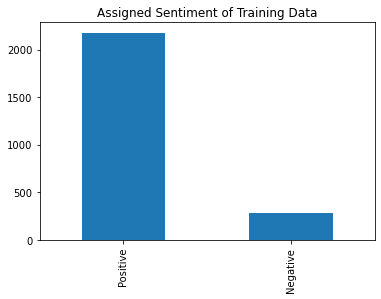

In [39]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

As you can see, most of our reviews are positive, let's see if we can sort it out even more for better results

In [40]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] >= 0.4:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] > 0.2 and yelp_data_s['Polarity'][i] < 0.4:
        sentiment.append('Slightly Positive')
    if yelp_data_s['Polarity'][i] <= 0.2 and yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Slightly Negative')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

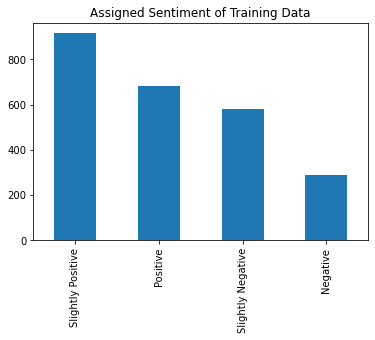

In [41]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

This is still a little biased towards positive reviews, but we did some research and it turns out that a large majority of all of yelp's reviews are positive so this makes sense.


In [42]:
yelp_data_s = yelp_data_s.rename(columns={'Stop_Words_%':'Stop_Words_P'})
yelp_data_s = yelp_data_s.rename(columns={'Positive_Words_%':'Positive_Words_P'})

 **CountVectorizer**

The CountVectorizer uses the bag of words approach to convert text to word counts and, more importantly, a vector. The vector for each word, paragraph, or sentence can then be compared to other vectors and we can see which ones are the most similar.

I'll start with the first review from one location to demonstrate:

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'went': 120, 'first': 36, 'time': 103, 'tonight': 105, 'within': 122, 'bite': 11, 'garlic': 40, 'bread': 12, 'knew': 55, 'would': 123, 'regulars': 83, 'yes': 125, 'even': 28, 'good': 45, 'better': 10, 'anywhere': 3, 'else': 24, 'everything': 30, 'authentic': 6, 'atmosphere': 5, 'incredibly': 48, 'warm': 116, 'inviting': 50, 'staff': 95, 'unmatched': 109, 'restaurant': 85, 'around': 4, 'favor': 33, 'side': 91, 'town': 106, 'stop': 97, 'relaxing': 84, 'dinner': 20, 'enjoy': 25, 'glass': 42, 'wine': 121, 'finish': 35, 'meal': 64, 'delicious': 19, 'cannoli': 13, 'piece': 77, 'tiramisu': 104, 'promise': 81, 'thing': 102, 'may': 62, 'regret': 82, 'able': 0, 'entire': 26, 'since': 92, 'portions': 80, 'generous': 41, 'makes': 59, 'feel': 34, 'welcome': 118, 'like': 58, 'family': 32, 'wouldnt': 124, 'want': 115, 'revisit': 86, 'place': 78, 'yummy': 126, 'food': 38, 'going': 43, 'amazing': 2, 'success': 100, 'neighborhood': 70, 'wait': 114, 'come': 16, 'back': 7, 'visit':

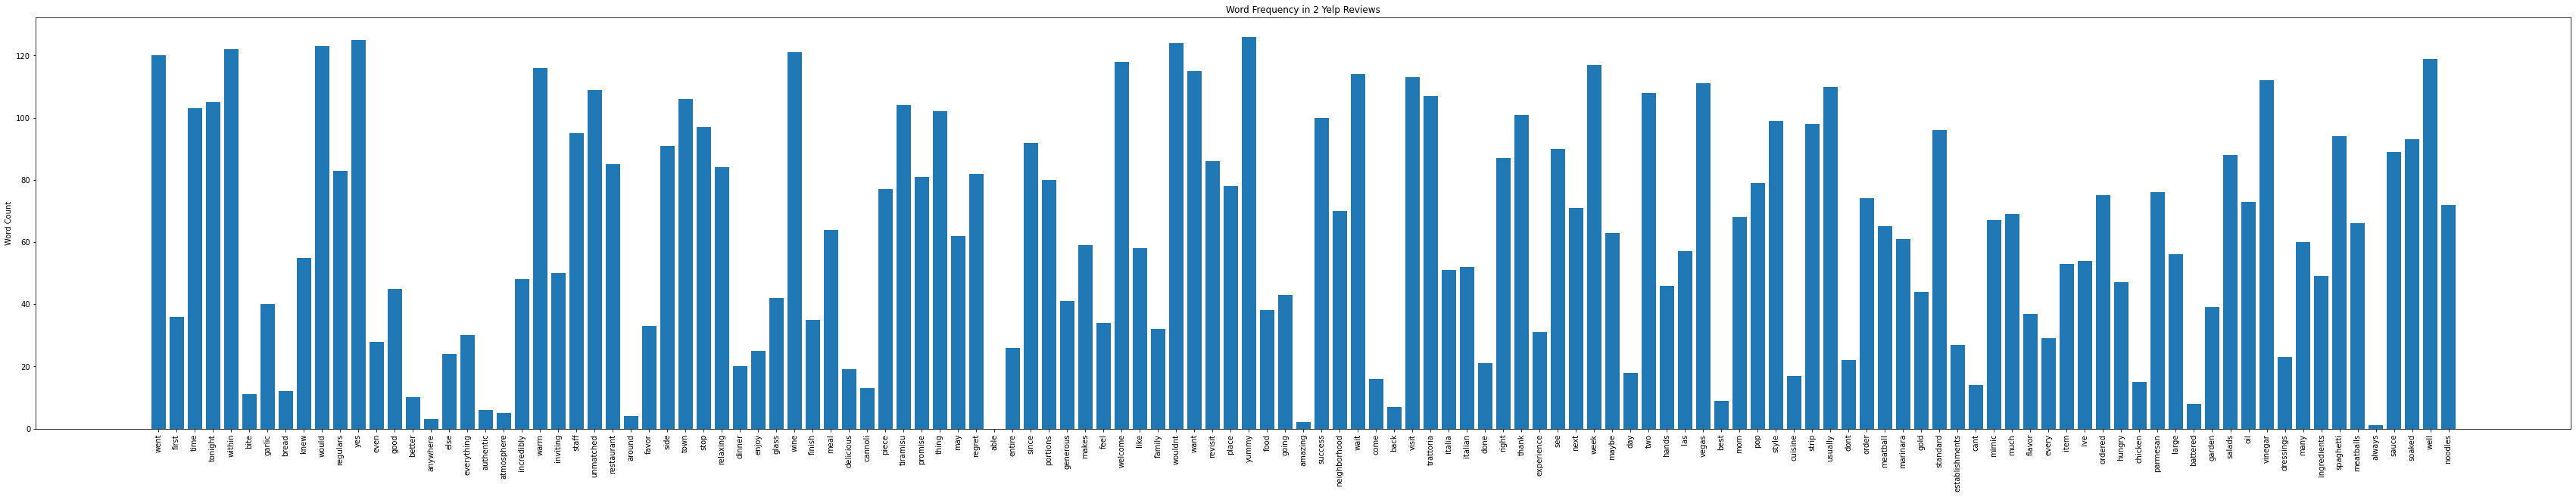

In [44]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(60,10))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews')
plt.ylabel('Word Count')
plt.show()

Here we've got 127 unique words in two reviews. If there's a 1 that means the word appears and a 0 means the unique word did not make an appearance. 2s and other values simply mean that the unique word appears multiple times

**TFIDF**

This stands for Term Frequency Inverse Document Frequency which means that in addition to measuring the word frequency in each review we can also measure how frequently a word appears among all lines of text. This is really important when it comes to picking out very unique words

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

#summary
print('List of unique Words: ',Tvectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',Tvector.shape)
print('')
print(Tvector.toarray())

List of unique Words:  {'went': 120, 'first': 36, 'time': 103, 'tonight': 105, 'within': 122, 'bite': 11, 'garlic': 40, 'bread': 12, 'knew': 55, 'would': 123, 'regulars': 83, 'yes': 125, 'even': 28, 'good': 45, 'better': 10, 'anywhere': 3, 'else': 24, 'everything': 30, 'authentic': 6, 'atmosphere': 5, 'incredibly': 48, 'warm': 116, 'inviting': 50, 'staff': 95, 'unmatched': 109, 'restaurant': 85, 'around': 4, 'favor': 33, 'side': 91, 'town': 106, 'stop': 97, 'relaxing': 84, 'dinner': 20, 'enjoy': 25, 'glass': 42, 'wine': 121, 'finish': 35, 'meal': 64, 'delicious': 19, 'cannoli': 13, 'piece': 77, 'tiramisu': 104, 'promise': 81, 'thing': 102, 'may': 62, 'regret': 82, 'able': 0, 'entire': 26, 'since': 92, 'portions': 80, 'generous': 41, 'makes': 59, 'feel': 34, 'welcome': 118, 'like': 58, 'family': 32, 'wouldnt': 124, 'want': 115, 'revisit': 86, 'place': 78, 'yummy': 126, 'food': 38, 'going': 43, 'amazing': 2, 'success': 100, 'neighborhood': 70, 'wait': 114, 'come': 16, 'back': 7, 'visit':

Lets see how we can make these metrics even better for our model

**Bigrams and min/max_df**

I believe Bigrams will be very important for this model because of how people tend to write these yelp reivews. Phrases like 'No good' or 'not bad' are very common but if you tokenize them into individual words it completely changes the meaning. Bigrams turn these tokens into token pairs and create more unique pairs with more meaning

In [46]:
text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'went': 255, 'first': 77, 'time': 221, 'tonight': 225, 'within': 259, 'bite': 23, 'garlic': 87, 'bread': 25, 'knew': 120, 'would': 261, 'regulars': 180, 'yes': 265, 'even': 60, 'good': 97, 'better': 21, 'anywhere': 7, 'else': 51, 'everything': 64, 'authentic': 13, 'atmosphere': 11, 'incredibly': 104, 'warm': 246, 'inviting': 108, 'staff': 204, 'unmatched': 232, 'restaurant': 184, 'around': 9, 'favor': 70, 'side': 196, 'town': 227, 'stop': 209, 'relaxing': 182, 'dinner': 43, 'enjoy': 54, 'glass': 91, 'wine': 257, 'finish': 74, 'meal': 138, 'delicious': 41, 'cannoli': 28, 'piece': 166, 'tiramisu': 223, 'promise': 176, 'thing': 219, 'may': 134, 'regret': 178, 'able': 0, 'entire': 56, 'since': 198, 'portions': 174, 'generous': 89, 'makes': 128, 'feel': 72, 'welcome': 250, 'like': 126, 'family': 68, 'wouldnt': 263, 'want': 244, 'revisit': 186, 'place': 169, 'yummy': 267, 'food': 82, 'going': 93, 'amazing': 4, 'success': 215, 'neighborhood': 152, 'wait': 242, 'come': 

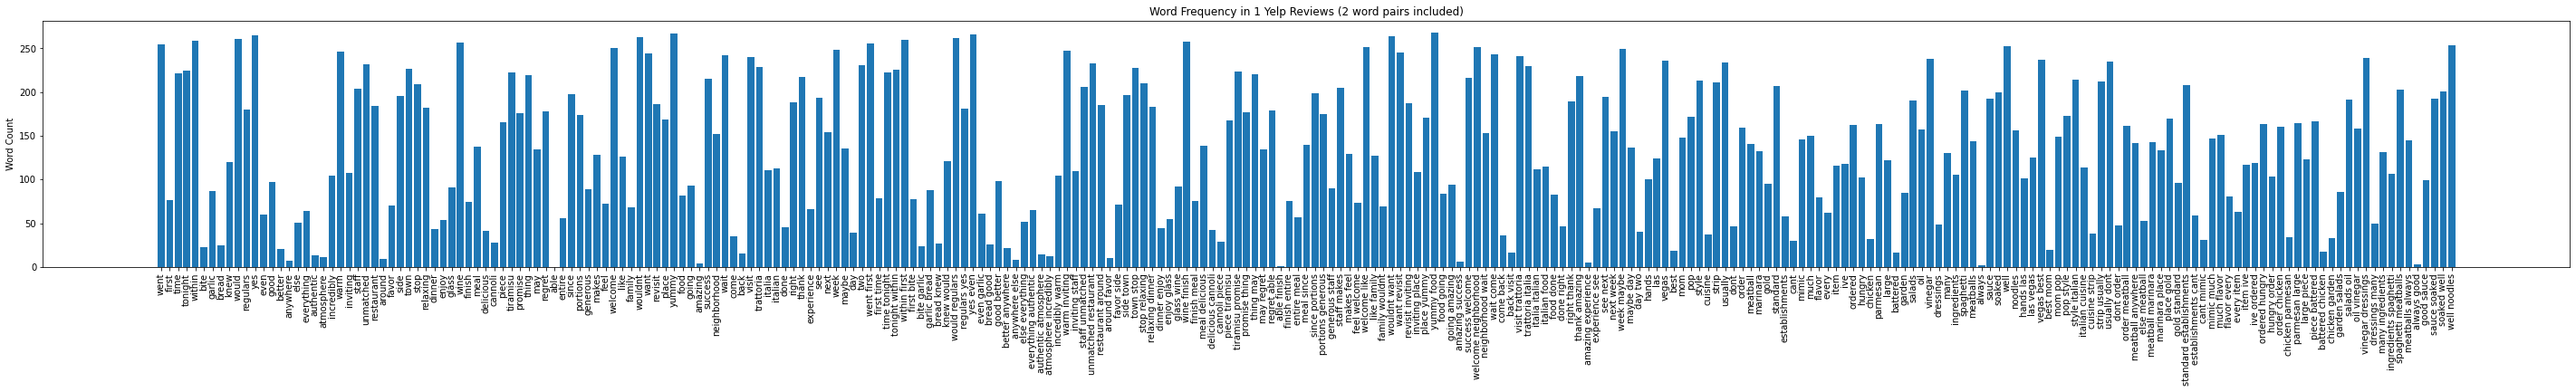

In [47]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(50,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 1 Yelp Reviews (2 word pairs included)')
plt.ylabel('Word Count')
plt.show()

min_df and max_df basically set limits on how much of the data we want to display in these arrays. min_df specifies how infrequently a word can appear to be significant and max_df does this oppositive

Specifying min and max_df saves time and memory for the code and filters our the words that only appear a couple of times (which are usually spelling errors anyway!)



In [48]:
text = yelp_data_s['No_Stop_Words:Sentence'][0:3]
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=2)
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'good': 5, 'anywhere': 0, 'else': 3, 'piece': 11, 'place': 12, 'food': 4, 'italian': 6, 'anywhere else': 1, 'italian food': 7, 'las': 8, 'vegas': 13, 'best': 2, 'many': 10, 'las vegas': 9}

Shape of the Sparse Matrix  (3, 14)

[[1 1 0 1 2 1 1 1 0 0 0 1 1 0]
 [1 1 1 1 0 1 1 0 1 1 1 1 1 1]
 [0 0 2 0 1 0 2 1 1 1 1 0 0 2]]


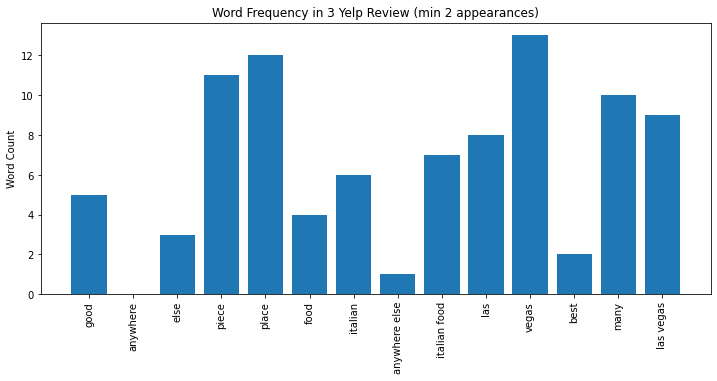

In [49]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 3 Yelp Review (min 2 appearances)')
plt.ylabel('Word Count')
plt.show()

In this case, out of 3 reviews these are the only words that appeared in 2 or more

**Creating a Training Dataset**

In [50]:
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

In [51]:
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='business_id'
col_name2 = 'stars'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_P'

col1 = yelp_data_s['business_id']
col2 = yelp_data_s['stars']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']
col5 = yelp_data_s['Positive_Words_P']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)
df.insert(4,col_name5,col5)


In [52]:
morDf = df[df['business_id'] == 'dPxZI9lrKTl5dvFfnb1_Ig']

In [53]:
print(morDf.iloc[7]['Polarity'])
print('Sentiment:', morDf.iloc[7]['Sentiment'])
x = morDf.iloc[7]['went':].sort_values(ascending=False)[:8]
x

0.6
Sentiment: Positive


wingsfing    0.427134
agav         0.380426
345          0.370205
intens       0.351076
poke         0.338819
search       0.322026
corner       0.287694
1010         0.222648
Name: 7, dtype: object

In [54]:
try:
    import pycm
except:
    !pip install -q pycm
    import pycm

In [55]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Accuracy Score:  0.5337837837837838

Overall Statistics : 

ACC Macro                                                         0.76689
F1 Macro                                                          0.4943
FPR Macro                                                         0.17033
Kappa                                                             0.32857
Overall ACC                                                       0.53378
PPV Macro                                                         0.63499
SOA1(Landis & Koch)                                               Fair
TPR Macro                                                         0.47427
Zero-one Loss                                                     345

Class Statistics :

Classes                                                           Negative              Positive              Slightly Negative     Slightly Positive     
ACC(Accuracy)                                                     0.90135               0.81757           

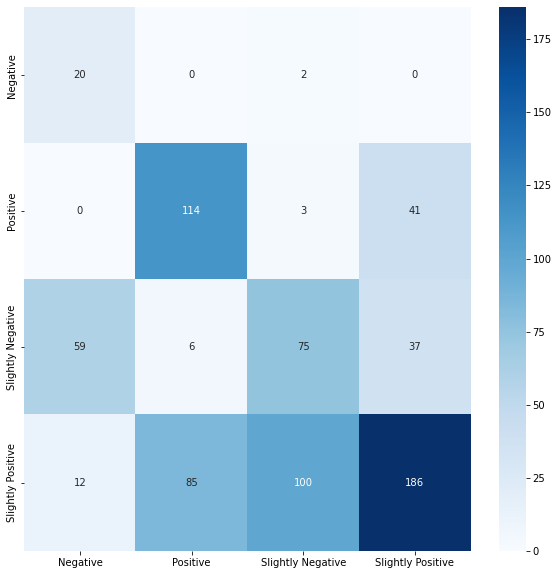

In [56]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pycm import *

X = df.iloc[0:,4:]
y = df.Sentiment

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

clf2 = LogisticRegression(solver = 'lbfgs')
model = Pipeline([('classifier',clf2)])
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
mat = confusion_matrix(predictions,ytest)
cm_df =  pd.DataFrame(mat, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

cm = ConfusionMatrix(actual_vector=list(ytest), predict_vector=list(predictions))
print('Accuracy Score: ',accuracy_score(predictions,ytest))
print('')
cm.stat(summary=True)

This is an alright start, but lets see if we can change the number of ngrams and the minimum/maximum number of occurances in the TFIDF vectorizer to find the optimal result and prevent overfitting

In [66]:
def mindf_test(numbers):
    scores = {}
    for num in numbers:
        text = yelp_data_s['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(min_df=num)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(),columns=voc)

        col_name1 ='business_id'
        col_name2 = 'Text'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_P'

        col1 = yelp_data_s['business_id']
        col2 = yelp_data_s['text']
        col3 = yelp_data_s['Polarity']
        col4 = yelp_data_s['sentiment']
        col5 = yelp_data_s['Positive_Words_P']

        df.insert(0,col_name1,col1)
        df.insert(1,col_name2,col2)
        df.insert(2,col_name3,col3)
        df.insert(3,col_name4,col4)
        df.insert(4,col_name5,col5)
        
        X = df.iloc[0:,4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

        clf2 = LogisticRegression(solver = 'lbfgs')
        model = Pipeline([('classifier',clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        score = accuracy_score(predictions,ytest)
        
        scores[num] = score
    return scores

Now lets create our list of number of minimum occurances. We don't want to set it too low or too high so lets start with 5-50. If we notice the trend moving up or down towards the ends of the curve we can change it but I think this range should capture the most accurate version of the model

In [67]:
min_list1 = list(range(5,50))

In [68]:
scores_list1 = mindf_test(min_list1)

Text(0, 0.5, 'Accuracy Score')

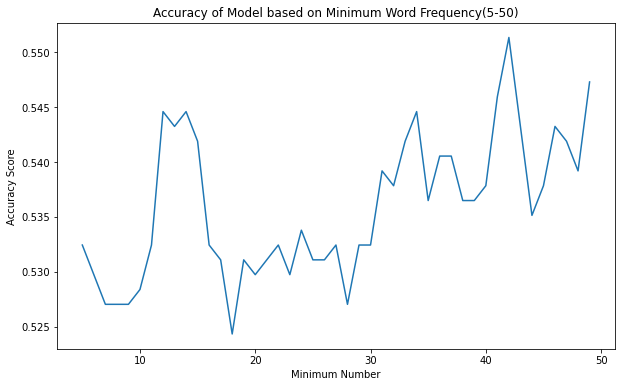

In [69]:
x = scores_list1.keys()
y = scores_list1.values()
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Accuracy of Model based on Minimum Word Frequency(5-50)')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score')

Looks like we're getting more accurate as we raise the minumum, let's try some higher values

In [70]:
min_list2 = list(range(40,100))
scores_list2 = mindf_test(min_list2)

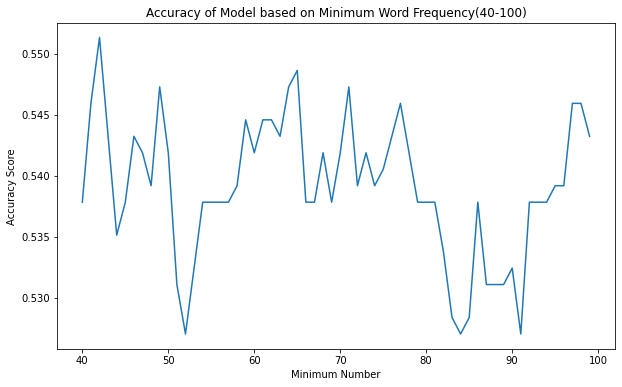

In [71]:
x = scores_list2.keys()
y = scores_list2.values()
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Accuracy of Model based on Minimum Word Frequency(40-100)')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score');

In [72]:
import operator
max(scores_list2.items(), key=operator.itemgetter(1))[0]

42

In [73]:
def ngrams_test(numbers):
    scores = {}
    for num in numbers:
        text = yelp_data_s['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(ngram_range=(1,num),min_df=42)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(),columns=voc)

        col_name1 ='business_id'
        col_name2 = 'Text'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_P'

        col1 = yelp_data_s['business_id']
        col2 = yelp_data_s['text']
        col3 = yelp_data_s['Polarity']
        col4 = yelp_data_s['sentiment']
        col5 = yelp_data_s['Positive_Words_P']

        df.insert(0,col_name1,col1)
        df.insert(1,col_name2,col2)
        df.insert(2,col_name3,col3)
        df.insert(3,col_name4,col4)
        df.insert(4,col_name5,col5)
        
        X = df.iloc[0:,4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

        clf2 = LogisticRegression(solver = 'lbfgs')
        model = Pipeline([('classifier',clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        score = accuracy_score(predictions,ytest)
        
        scores[num] = score
    return scores

In [74]:
ngram_list = [1,2,3,4]
ngram_scores = ngrams_test(ngram_list)


Text(0, 0.5, 'Accuracy Score')

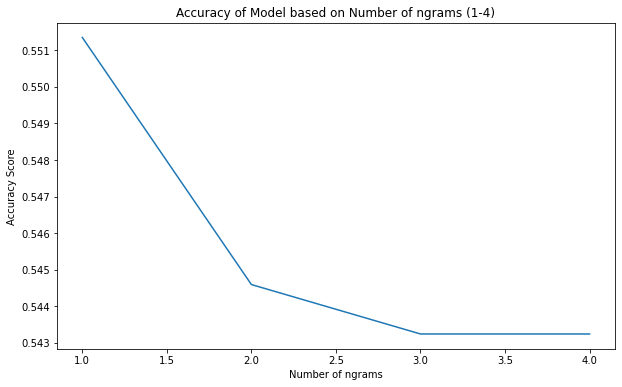

In [75]:
x = ngram_scores.keys()
y = ngram_scores.values()
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Accuracy of Model based on Number of ngrams (1-4)')
plt.xlabel('Number of ngrams')
plt.ylabel('Accuracy Score')

In this case, our ideal TFIDF output is 1 ngrams with a min_df of 42! Let's create a dataframe to export for modeling

In [76]:
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer(min_df=42,ngram_range=(1,2))
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='business_id'
col_name2 = 'Text'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_P'

col1 = yelp_data_s['business_id']
col2 = yelp_data_s['text']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']
col5 = yelp_data_s['Positive_Words_P']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)
df.insert(4,col_name5,col5)

In [56]:
df.to_csv(r'yelp_data_sentiment.csv',index=False)

# Conclusion
As you can see, with just a simple model we're off to a 55% accuracy. Once we take these features and apply them to a better model and experiment with number of ngrams and all things like that we should see much better performance!

In the next notebook, we're finally going to build our model which we'll need to first decide which model to use and how to improve on it.